In [2]:
import numpy as np
dataset_list = [ 'ohio', 'abc4d', 'ctr3_cgm_only', 'replace-bg']
version = 'coldstart_fl'

type_sd_dtst_mtc2value = {}
for seed in [1, 2, 3, 4]:  
    
    if seed == 1:
        experiment_version = 'exp_5' 
    else:
        experiment_version = 'exp_5' + '_seed_' +str(seed) # ph 30
        
    for load_dataset in dataset_list:
        pop_metrics_dic = np.load(f'D:/code_log/{version}/{experiment_version}/fine_tuning_{load_dataset}_before.npy', allow_pickle=True)[()]
        pop_per_metrics_dic = np.load(f'D:/code_log/{version}/{experiment_version}/fine_tuning_{load_dataset}_after.npy', allow_pickle=True)[()]
        per_metrics_dic = np.load(f'D:/code_log/{version}/{experiment_version}/fine_tuning_{load_dataset}_pure.npy', allow_pickle=True)[()]
        
        for mtc in pop_metrics_dic:
            type_sd_dtst_mtc2value[('pop', seed, load_dataset, mtc)] = np.mean(pop_metrics_dic[mtc])
            
        for mtc in pop_per_metrics_dic:
            type_sd_dtst_mtc2value[('pop_per', seed, load_dataset, mtc)] = np.mean(pop_per_metrics_dic[mtc])
        
        for mtc in per_metrics_dic:
            type_sd_dtst_mtc2value[('per', seed, load_dataset, mtc)] = np.mean(per_metrics_dic[mtc])
for load_dataset in dataset_list:
    for mtc in pop_metrics_dic:
        for tp in ['pop', 'pop_per', 'per']:
            temp = []
            for seed in [1, 2, 3, 4]: 
                temp.append(type_sd_dtst_mtc2value[(tp, seed, load_dataset, mtc)] )
            type_sd_dtst_mtc2value[(tp, load_dataset, mtc)] = (np.mean(temp), np.std(temp))

C:\Users\Chengzhe Piao\AppData\Local\Temp\ipykernel_17124\2400843238.py:87: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


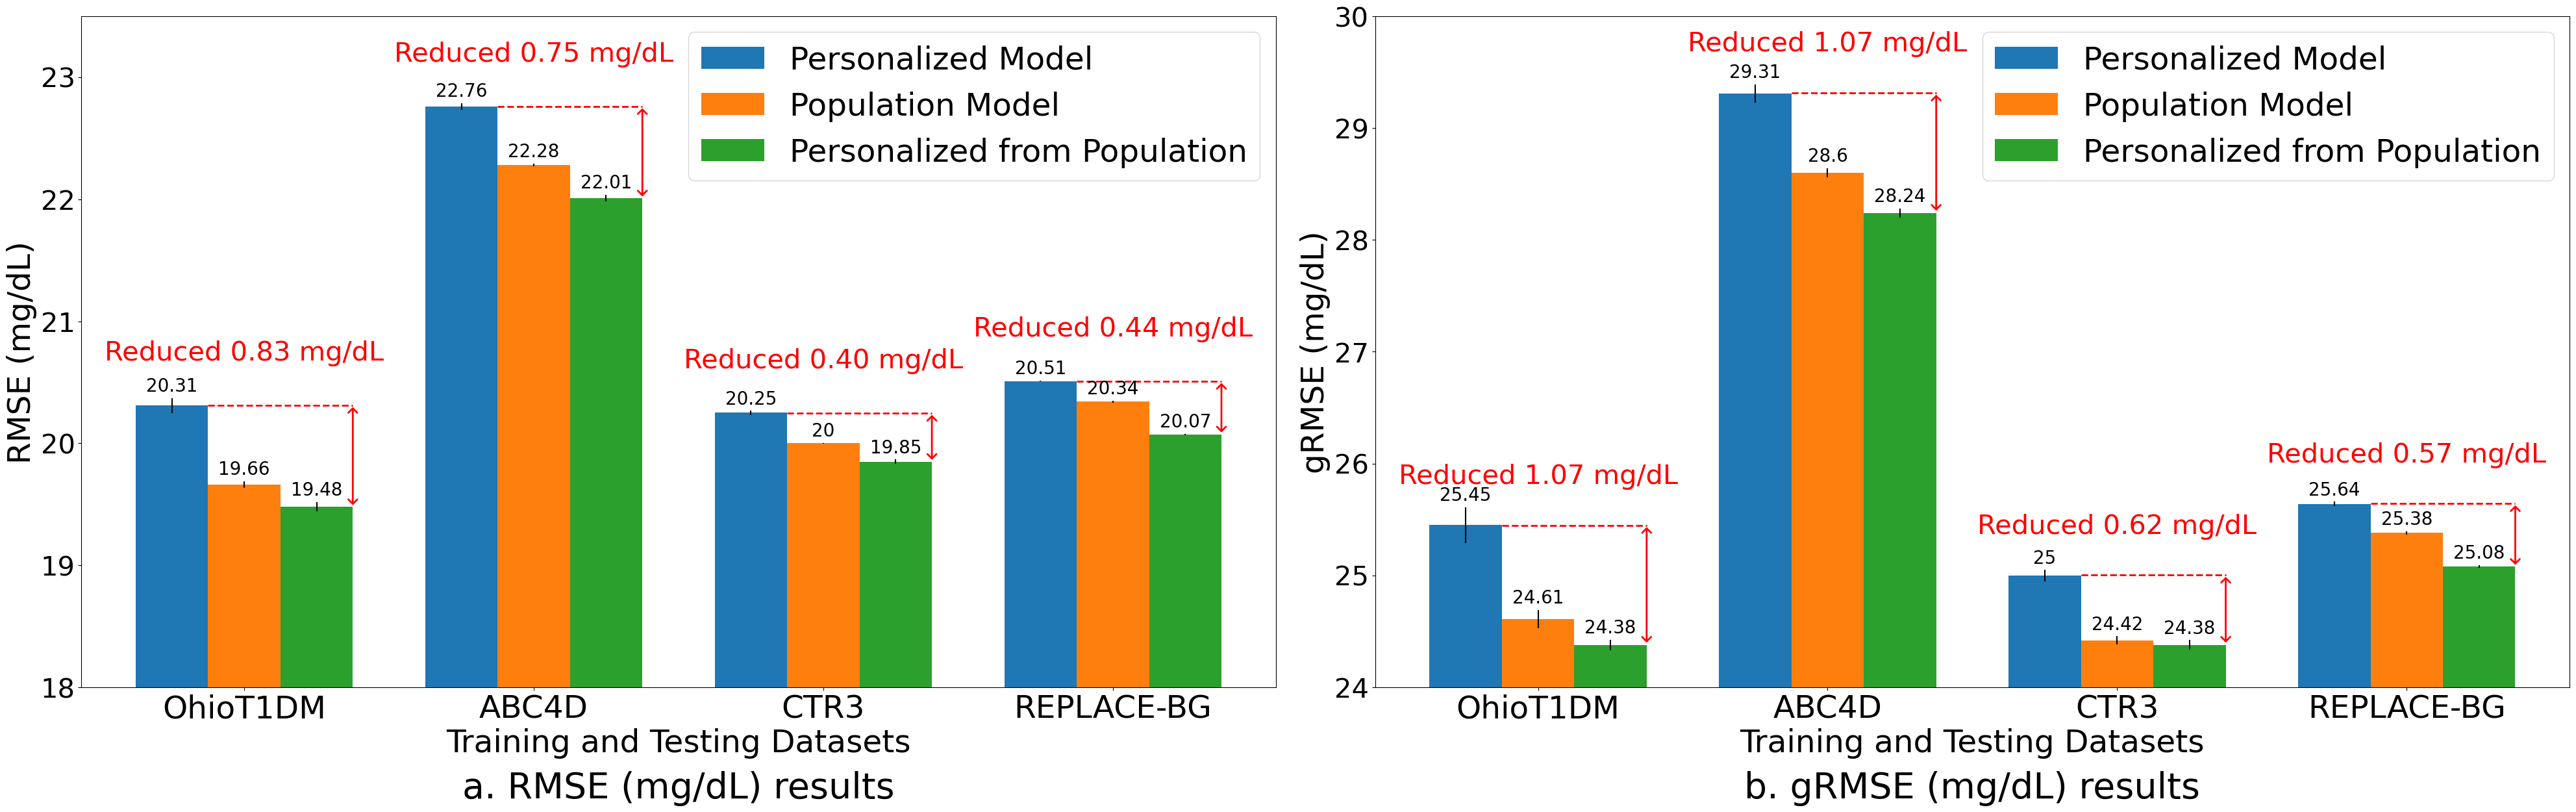

In [3]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(figsize = (40, 12.5), nrows=1, ncols=2, layout='constrained')
axs = axs.flat

limits = {
    'rmse' : (18, 23.5),
    'mape' : (9, 13),
    'mae' : (13, 16),
    'grmse' : (24, 30),
}
mtc2name = {
    'rmse' : 'RMSE (mg/dL)',
    'mape' : 'MARD (%)',
    'mae' : 'MAE (mg/dL)',
    'grmse': 'gRMSE (mg/dL)',
}
tp2name = {
    'pop' : 'Population Model',
    'pop_per' : 'Personalized from Population',
    'per' : 'Personalized Model',
}

dataset2name = {
    'ohio':'OhioT1DM', 'abc4d':'ABC4D', 'ctr3_cgm_only':'CTR3', 'replace-bg':'REPLACE-BG'
}

subtitles = ['a', 'b', 'c', 'd']
for r, mtc in enumerate(['rmse', 'grmse']):
    ax = axs[r]
    width = 0.25  # the width of the bars
    multiplier = 0

    method_rmse = []
    for tp in ['per', 'pop', 'pop_per']:  
        mean_x = []
        std_x = []
        mean_x_org = []
        for dataset in dataset_list: 
            mean_x.append(round(type_sd_dtst_mtc2value[(tp, dataset, mtc)][0], 2) )
            mean_x_org.append(type_sd_dtst_mtc2value[(tp, dataset, mtc)][0])
            std_x.append(type_sd_dtst_mtc2value[(tp, dataset, mtc)][1] )
        offset = width * multiplier 
        x = np.arange(len(dataset_list)) 
        
        rects = ax.bar(x + offset, mean_x, width, label=tp2name[tp], yerr=std_x)
        ax.bar_label(rects, padding=3, fontsize=20)
        multiplier += 1
        
        method_rmse.append(mean_x_org)
    
    method_rmse = np.array(method_rmse) # 3 4
   
    vertical_offset =  0.32 # Adjust this factor as needed.

    for j in range(method_rmse.shape[1]):
        # Update the annotation with adjusted text positioning and alignment.
        
        ax.annotate(
            '',  # Use an empty string if you don't want text but just the arrow.
            xy=(x[j] + width * 2.5, method_rmse[0, j]),  # Pointing to
            xytext=(x[j] + width * 2.5, method_rmse[-1, j]),  # Text and arrow start point
            textcoords='data',  # Coordinate system for text: 'offset points' or 'data'
            arrowprops=dict(arrowstyle='<->, head_length=0.5,head_width=0.5', lw=2, color='red'),
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
        )
        print_out_1 = method_rmse[0, j] - method_rmse[-1, j]
        ax.text(
            x[j] + width, 
            method_rmse[0, j] + vertical_offset,  # Adjust this for text placement
            f'Reduced {print_out_1:.2f} mg/dL', 
            ha='center', 
            va='bottom',
            fontsize=30,  # Adjust font size as needed
            color = 'red'
        )
        ax.hlines(y=method_rmse[0, j], xmin=x[j] + width * 0.5 , xmax=x[j] + width * 2.5, colors='red', linestyles='dashed', lw=2)
            
     
    ax.set_ylim(*limits[mtc])
    ax.legend(fontsize=35)
    ax.set_xticks(x + width, [dataset2name[dt] for dt in dataset_list], fontsize=35)
    ax.set_ylabel(mtc2name[mtc], fontsize=35 )
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xlabel('Training and Testing Datasets', fontsize=35)
    ax.text(0.5, -0.15, subtitles[r] + '. ' + f'{mtc2name[mtc]} results', ha='center', va='center', transform=ax.transAxes, fontsize=40)
plt.tight_layout()
plt.savefig(f'./summary/fine_tune_compare.pdf') 